# Importando bibliotecas e dados

In [9]:
# Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importando o dataset

df = pd.read_csv(r'C:\Users\Pradolux\Downloads\Salarios_Area_Dados\jobs_in_data.csv')
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


# Verificação e tratamento dos dados

In [5]:
# Verificando se existem valores faltantes
missing_values = df.isnull().sum()
missing_values

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [7]:
# Verificando valores unicos

unique_values = df.nunique()
unique_values

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [8]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

# Análise exploratória

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


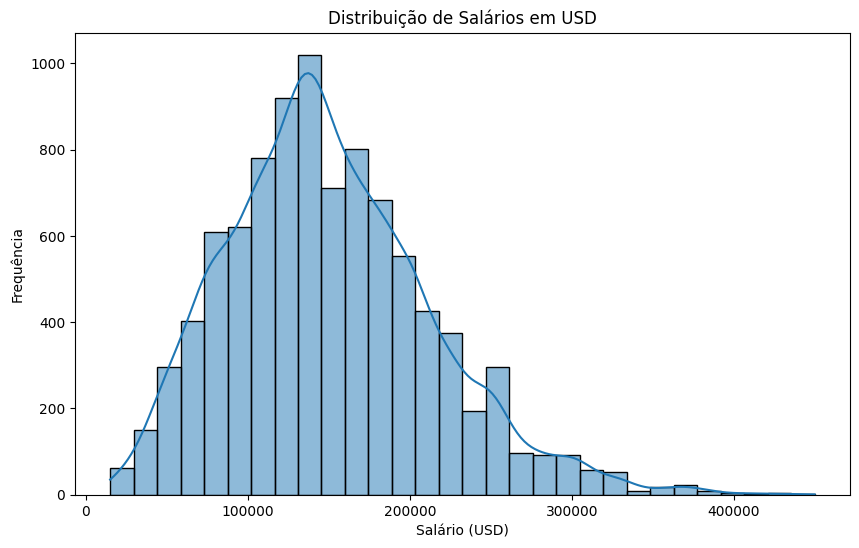

In [10]:
# Estatísticas descritivas de salário em USD
print(df['salary_in_usd'].describe())

# Histograma para visualizar a distribuição de salários
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribuição de Salários em USD')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\3313240687.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='viridis')
C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\3313240687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='viridis')


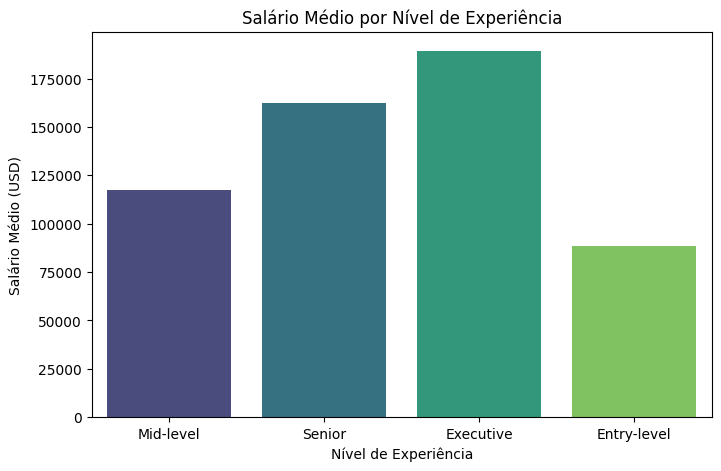

In [11]:
# Gráfico de barras para salário médio por nível de experiência
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='viridis')
plt.title('Salário Médio por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio (USD)')
plt.show()

C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\1626310852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_salary.values, y=company_salary.index, palette='coolwarm')


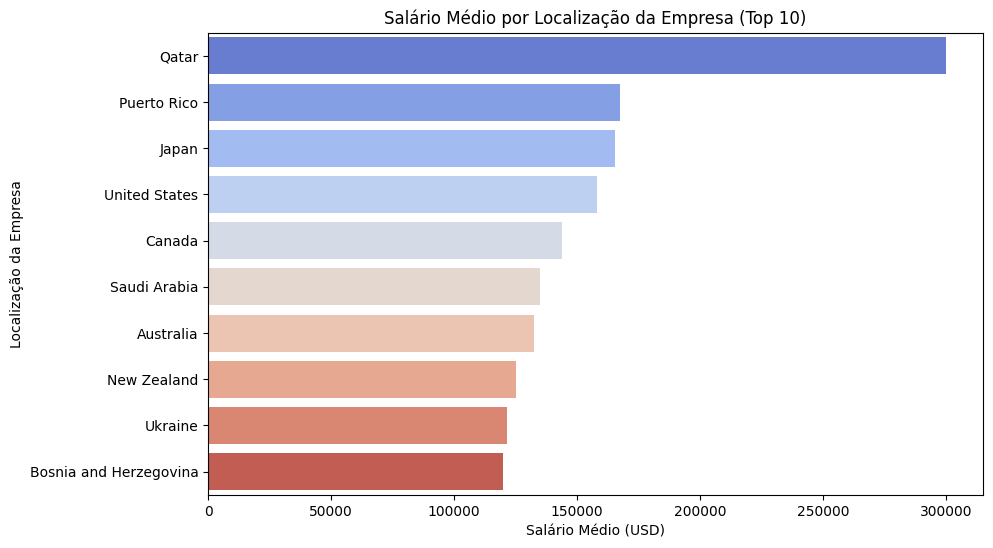

In [12]:
# Salário médio por localização da empresa
plt.figure(figsize=(10, 6))
company_salary = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=company_salary.values, y=company_salary.index, palette='coolwarm')
plt.title('Salário Médio por Localização da Empresa (Top 10)')
plt.xlabel('Salário Médio (USD)')
plt.ylabel('Localização da Empresa')
plt.show()

C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\3160663959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=residence_salary.values, y=residence_salary.index, palette='coolwarm')


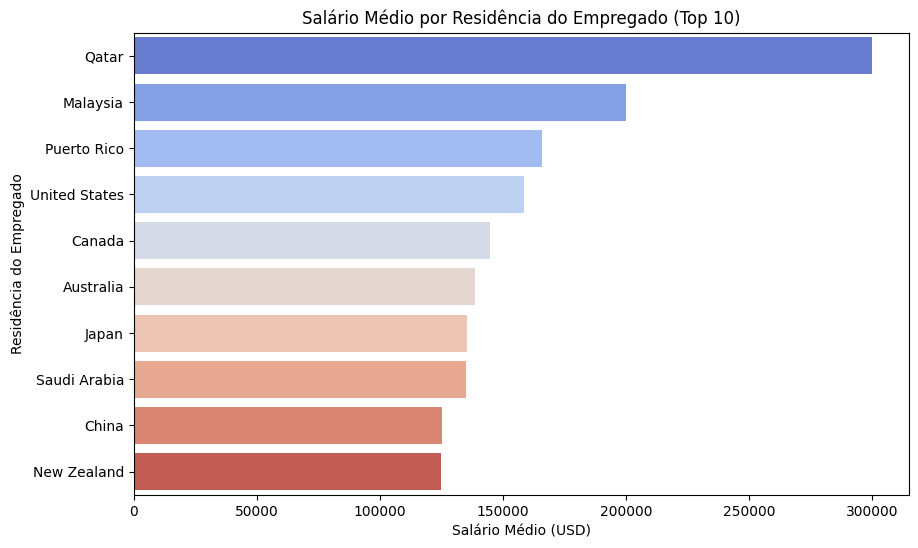

In [13]:
# Salário médio por residência do empregado
plt.figure(figsize=(10, 6))
residence_salary = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=residence_salary.values, y=residence_salary.index, palette='coolwarm')
plt.title('Salário Médio por Residência do Empregado (Top 10)')
plt.xlabel('Salário Médio (USD)')
plt.ylabel('Residência do Empregado')
plt.show()

C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\4145094745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.values, y=job_counts.index, palette='plasma')


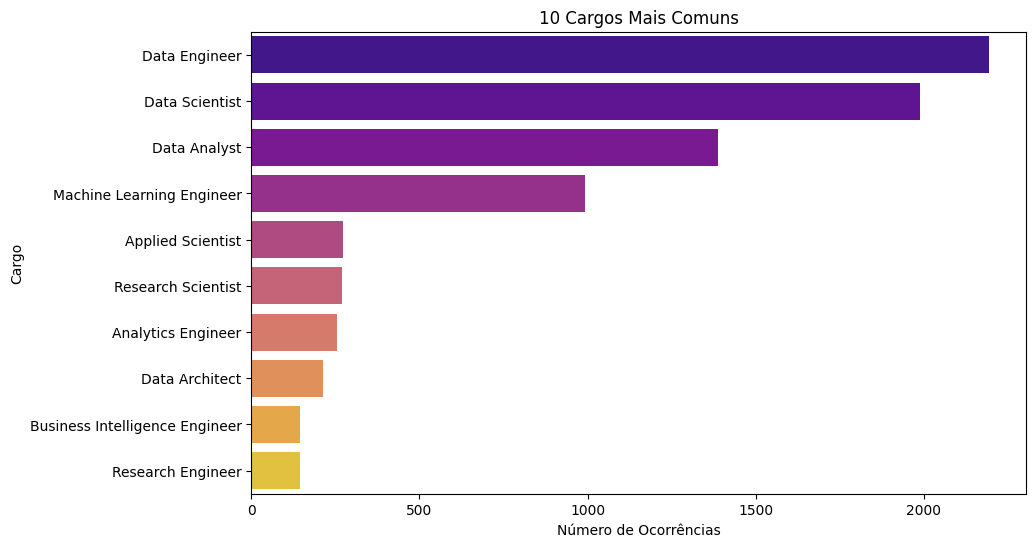

In [14]:
# Contagem dos 10 cargos mais comuns
plt.figure(figsize=(10, 6))
job_counts = df['job_title'].value_counts().head(10)
sns.barplot(x=job_counts.values, y=job_counts.index, palette='plasma')
plt.title('10 Cargos Mais Comuns')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Cargo')
plt.show()


C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\4229218364.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['job_title'].isin(top_jobs)], x='salary_in_usd', y='job_title', estimator=lambda x: x.mean(), ci=None, palette='magma')
C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\4229218364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['job_title'].isin(top_jobs)], x='salary_in_usd', y='job_title', estimator=lambda x: x.mean(), ci=None, palette='magma')


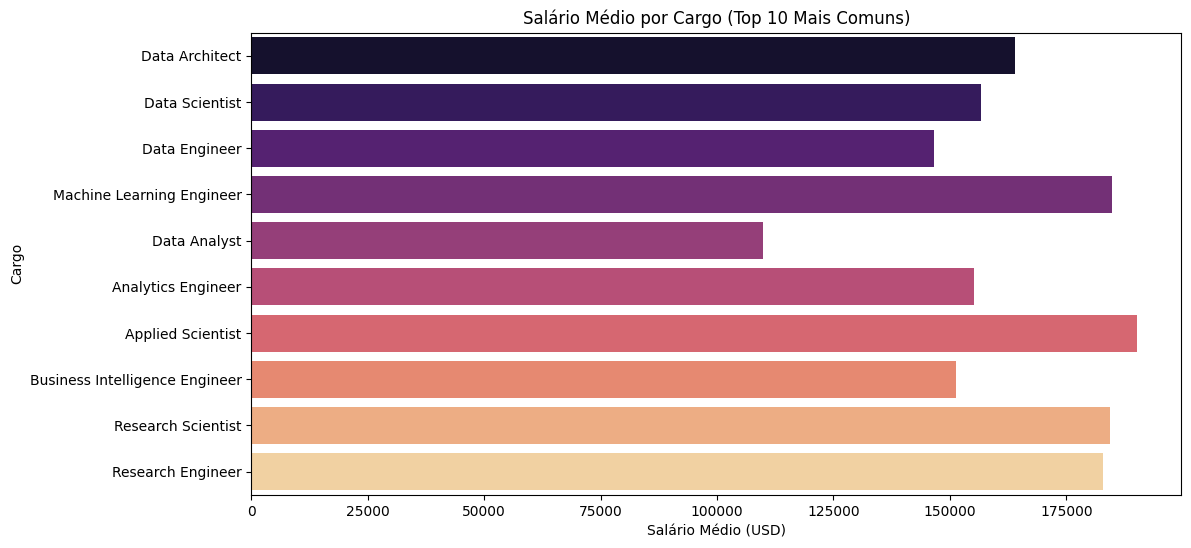

In [15]:
# Salário médio por cargo (Top 10 mais comuns)
top_jobs = job_counts.index.tolist()
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['job_title'].isin(top_jobs)], x='salary_in_usd', y='job_title', estimator=lambda x: x.mean(), ci=None, palette='magma')
plt.title('Salário Médio por Cargo (Top 10 Mais Comuns)')
plt.xlabel('Salário Médio (USD)')
plt.ylabel('Cargo')
plt.show()

C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\228722495.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='employment_type', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='cubehelix')
C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\228722495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='employment_type', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='cubehelix')


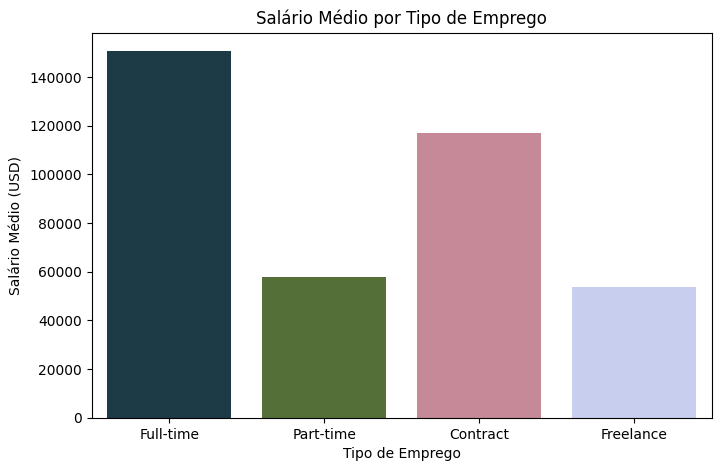

In [16]:
# Salário por tipo de emprego
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='employment_type', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='cubehelix')
plt.title('Salário Médio por Tipo de Emprego')
plt.xlabel('Tipo de Emprego')
plt.ylabel('Salário Médio (USD)')
plt.show()

C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\3964086313.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='work_setting', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='muted')
C:\Users\Pradolux\AppData\Local\Temp\ipykernel_9752\3964086313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='work_setting', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='muted')


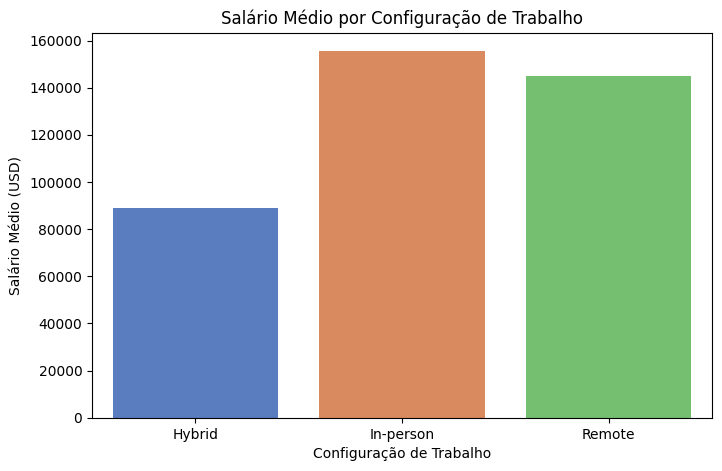

In [17]:
# Salário por configuração de trabalho (remoto, híbrido, presencial)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='work_setting', y='salary_in_usd', estimator=lambda x: x.mean(), ci=None, palette='muted')
plt.title('Salário Médio por Configuração de Trabalho')
plt.xlabel('Configuração de Trabalho')
plt.ylabel('Salário Médio (USD)')
plt.show()

# Análises Estatísticas

In [18]:
# Comparar médias e medianas salariais por nível de experiência
experience_stats = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median']).reset_index()
print(experience_stats)

  experience_level           mean    median
0      Entry-level   88534.776210   80000.0
1        Executive  189462.914591  185000.0
2        Mid-level  117523.918138  110000.0
3           Senior  162356.126099  155000.0


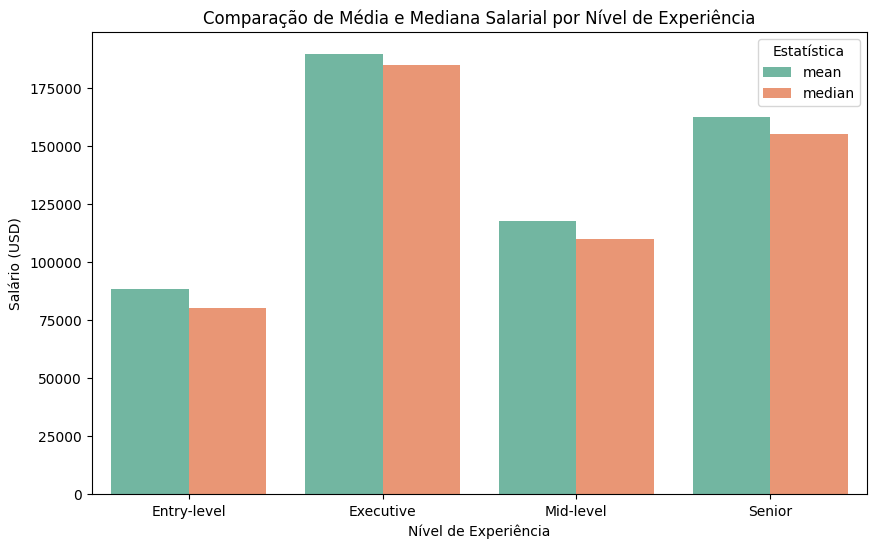

In [19]:
# Gráfico de barras para comparação de média e mediana por nível de experiência
plt.figure(figsize=(10, 6))
sns.barplot(data=experience_stats.melt(id_vars='experience_level'), x='experience_level', y='value', hue='variable', palette='Set2')
plt.title('Comparação de Média e Mediana Salarial por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário (USD)')
plt.legend(title='Estatística')
plt.show()

In [20]:
# Comparar médias e medianas salariais por configuração de trabalho
work_setting_stats = df.groupby('work_setting')['salary_in_usd'].agg(['mean', 'median']).reset_index()
print(work_setting_stats)

  work_setting           mean    median
0       Hybrid   88912.287958   74000.0
1    In-person  155524.120942  145000.0
2       Remote  144996.016599  141525.0


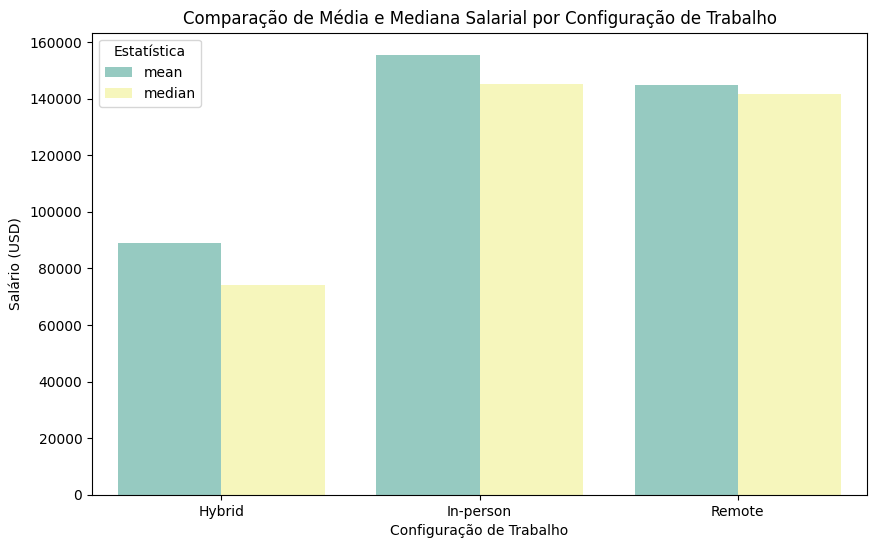

In [21]:
# Gráfico de barras para comparação de média e mediana por configuração de trabalho
plt.figure(figsize=(10, 6))
sns.barplot(data=work_setting_stats.melt(id_vars='work_setting'), x='work_setting', y='value', hue='variable', palette='Set3')
plt.title('Comparação de Média e Mediana Salarial por Configuração de Trabalho')
plt.xlabel('Configuração de Trabalho')
plt.ylabel('Salário (USD)')
plt.legend(title='Estatística')
plt.show()

# Análise de Correlação


In [32]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [33]:
# Criando uma  cópia do dataframe e transformando colunas categóricas em numéricas
df_encoded = pd.get_dummies(df, columns=['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size'])

In [34]:
# Calculando a correlação com o salário
correlation_matrix = df_encoded.corr()
salary_correlation = correlation_matrix['salary_in_usd'].sort_values(ascending=False)

In [35]:
# Mostrando as principais correlações com o salário
print(salary_correlation.head(10))
print(salary_correlation.tail(10))

salary_in_usd                             1.000000
salary                                    0.991309
salary_currency_USD                       0.347783
employee_residence_United States          0.331113
company_location_United States            0.320795
experience_level_Senior                   0.303894
job_category_Machine Learning and AI      0.192326
job_title_Machine Learning Engineer       0.187905
work_year                                 0.166003
job_category_Data Science and Research    0.146882
Name: salary_in_usd, dtype: float64
employee_residence_United Kingdom   -0.159962
company_location_United Kingdom     -0.162969
employee_residence_Spain            -0.164273
company_location_Spain              -0.165179
salary_currency_GBP                 -0.191117
experience_level_Entry-level        -0.231340
experience_level_Mid-level          -0.259234
salary_currency_EUR                 -0.266097
job_title_Data Analyst              -0.266847
job_category_Data Analysis          -0.2

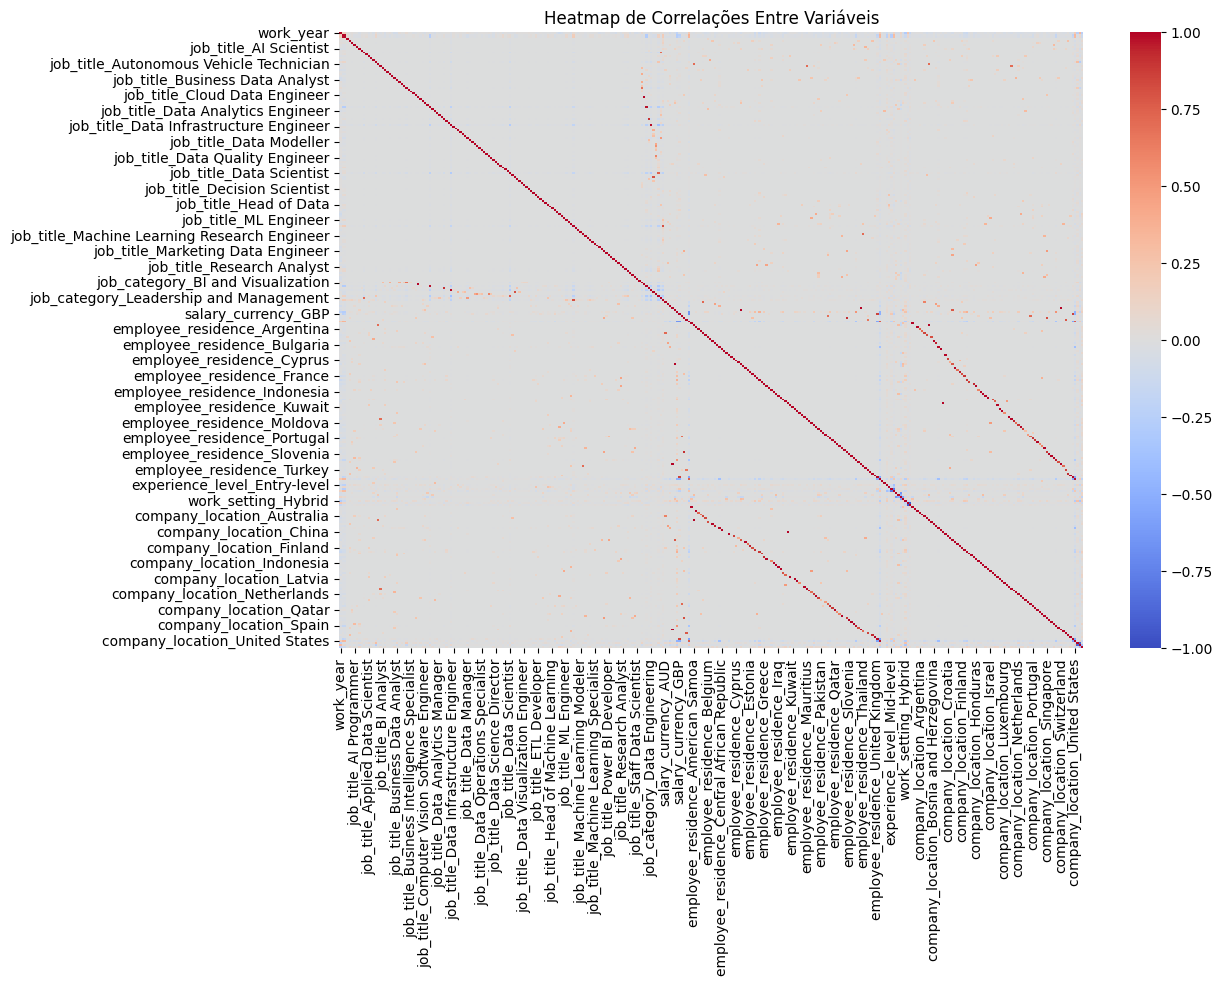

In [36]:
# Heatmap das correlações para visualização
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Correlações Entre Variáveis')
plt.show()